In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

In [129]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
train_data.Age.fillna(train_data.Age.median(), inplace=True)
train_data.Fare.fillna(train_data.Fare.median(), inplace=True)
X_train = pd.get_dummies(train_data[features])
y_train = train_data.Survived

In [130]:
r_tree = RandomForestRegressor(random_state=42)
clf = DecisionTreeClassifier()

In [ ]:
r_tree.fit(X_train, y_train)

In [ ]:
test_data.Age.fillna(test_data.Age.median(), inplace=True)
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)

In [ ]:
X_test = pd.get_dummies(test_data[features])

In [ ]:
X_test.isna().sum()

In [ ]:
y_predicted = r_tree.predict(X_test)

In [ ]:
y_predicted_Series = pd.Series(y_predicted)

In [ ]:
y_predicted_Series.hist()

In [ ]:
threshold = y_predicted_Series.median()

In [ ]:
y_predicted_binary = np.where(y_predicted_Series > threshold, 1, 0)

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': y_predicted_binary})
output.to_csv('submission.csv', index=False)

In [131]:
from sklearn.model_selection import GridSearchCV

In [135]:
parametrs = {'criterion' : ['gini', 'entropy'], 
             'max_depth' : range(1,50),
             'min_samples_split' : range(2,5),
             'min_samples_leaf' : range(1,5)}

In [136]:
gridCV_tree = GridSearchCV(clf, parametrs, cv=5)

In [137]:
gridCV_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5)})

In [138]:
best_clf = gridCV_tree.best_estimator_

In [139]:
y_prob = best_clf.predict_proba(X_test)

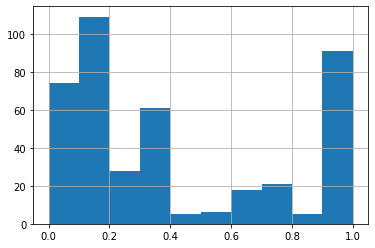

In [145]:
pd.Series(y_prob[:,1]).hist()

In [149]:
med = pd.Series(y_prob[:,1]).median()

In [152]:
y_pred_clf = np.where(y_prob[:,1] > med, 1, 0)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [156]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': y_pred_clf})
output.to_csv('submission.csv', index=False)